In [1]:
import keras
from keras import models
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
x_train=x_train/255
x_test=x_test/255

(50000, 32, 32, 3)
(50000, 1)


In [0]:
#mean = np.mean(x_train,axis=(0,1,2,3))
#std = np.std(x_train,axis=(0,1,2,3))
#x_train = (x_train-mean)/(std+1e-7)
#x_test = (x_test-mean)/(std+1e-7)

In [5]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(512,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 512)      

In [7]:
model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 38s 761us/step - loss: 1.4044 - acc: 0.4855 - val_loss: 1.1334 - val_acc: 0.6009
Epoch 2/4
50000/50000 [==============================] - 30s 602us/step - loss: 0.9312 - acc: 0.6711 - val_loss: 0.8548 - val_acc: 0.7029
Epoch 3/4
50000/50000 [==============================] - 30s 604us/step - loss: 0.7208 - acc: 0.7467 - val_loss: 0.7622 - val_acc: 0.7366
Epoch 4/4
50000/50000 [==============================] - 30s 601us/step - loss: 0.5821 - acc: 0.7956 - val_loss: 0.7266 - val_acc: 0.7513


In [8]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 171us/step


[0.7266008784294128, 0.7513]

In [0]:
class_map = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

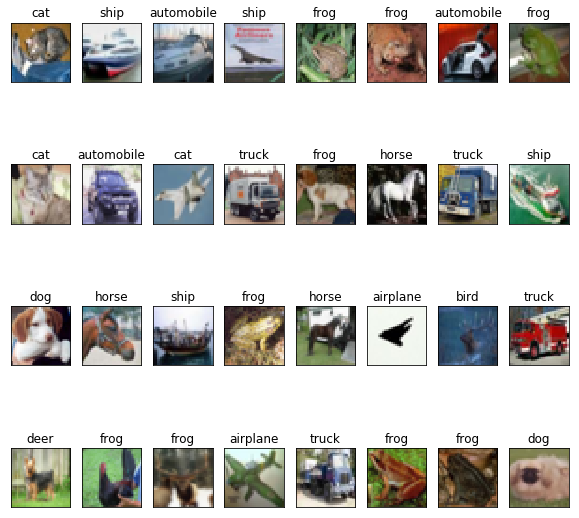

In [15]:
fig = plt.figure(figsize=(10, 10))
for i, j in enumerate(x_test[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    title  = model.predict(j.reshape(-1,32,32,3))
    ax.set_title(class_map[np.argmax(title)])
    plt.imshow(j)

In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [12]:
model = Sequential()
model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3) ))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 133s 3ms/step - loss: 1.7442 - acc: 0.3048 - val_loss: 1.4977 - val_acc: 0.4205
Epoch 2/4
50000/50000 [==============================] - 130s 3ms/step - loss: 1.2369 - acc: 0.5491 - val_loss: 1.0384 - val_acc: 0.6331
Epoch 3/4
50000/50000 [==============================] - 130s 3ms/step - loss: 0.9553 - acc: 0.6677 - val_loss: 0.8772 - val_acc: 0.7047
Epoch 4/4
50000/50000 [==============================] - 130s 3ms/step - loss: 0.7932 - acc: 0.7286 - val_loss: 0.8975 - val_acc: 0.7046
